# Deutsch's Algorithm
***
In this notebook, we will be exploring Deutsch's Algorithm. Before we tackle the algorithm, we must first have an understanding of some fundamental concepts in Quantum Computing. 

# Table of Contents
1. [Introduction to Quantum Computing](#intro)
    1. [Historical Context](#history)
    2. [Fundamentals of Quantum Computing](#quantum)
        1. [Qubits](#quantum-qubits)
        2. [Quantum Superposition](#quantum-superposition)
        3. [Quantum Entaglement](#quantum-entaglement)
        4. [Quantum Gates & Circuits](#quantum-gatescircuits)
2. [Deutsch's Algorithm](#deutschalgo)
     1. [Deutsch's Problem](#deutschalgo-problem)
     2. [The Oracle](#deutschalgo-oracle)
     3. [The Quantum Circuit](#deutschalgo-circuit)
3. [Qiskit](#qiskit)
    1. [Introduction to Qiskit](#qiskit-intro)
        1. [Installing Qiskit](#qiskit-install)
        2. [Fundamental Concepts in Qiskit](#qiskit-fundamentals)
4. [Deutsch's Algorithm in Qiskit](#deutsch-qiskit)
    1. [Building the Quantum Circuit](#deutsch-circuit)
    2. [Implementing the Oracle](#deutsch-oracle)
    3. [Running the Simulation](#deutsch-simulation)
5. [Results](#results)
6. [Conclusion](#conclusion)
7. [References](#refrences)

<a id="Introduction"></a>
# Introduction to Quantum Computing
***

At its core, quantum computing is a rapidly-emerging technology that harnesses the laws of quantum mechanics to solve problems too complex for classical computers [<a href="#1">1</a>]. Quantum computers use quantum mechanics concepts such as quantum interference, superposition and entaglement to perform calculations. The main difference between a quantum computer and a classical computer is the way in which they use bits. A classical computer uses bits that are either 0 or 1, whereas a quantum computer uses quantum bits, better known as qubits, which can exist in multiple states simultaneously. In concept, this allows quantum computers to process a significant amount of information at once in comparison to a classical computer. At the moment, quantum computers are unable to solve a meaningful task more efficiently than a classical computer, as quantum computers today have a relatively small number of qubits. More qubits are required to be able to reach the potential to solve complex problems efficiently. Quantum computers have difficulty maintaining qubit stability, which restricts what tasks can be performed without high error rates. Unfortunately it's not as simple as adding more qubits, as scaling up the number of qubits while maintaining consistency and coherence can be costly, and technically challenging. While quantum computing has been a concept for several decades, these issues are what classifies quantum computing as an emerging technology. It's clear there is enormous potential, but there needs to be some more research and computational advances before we can say quantum computers could take the place of classical computers.

<a id="History"></a>
## Historical Context

The theoretical foundation for quantum computing was largely laid in the 1980's by Richard Feynman. In a paper published by Feynman in 1982, *Simulating Physics with Computers* [<a href="#2">2</a>], he stated the difficulty that classical computers face when attempting to simulate quantum systems. In this paper, he proposes that a computer which uses the concepts of quantum mechanics would be much more suited to this task, and highlighted how quantum mechanics could potentially provide new ways of storing and processing information in comparison to classical computers. This paper, among other contributions from Feynman, laid the foundation of quantum computing and conceptualized aspects that are still influential to this day.

David Deustch, the creator of the algorithm that this project focuses on, extended Feynman's idea of the quantum computer by forming the quantum Turing machine, which serves as a foundational model for quantum computing. It demonstrated how a quantum computer could surpass classical computers. Deustch then went on to develop the aptly named Deustch's Algorithm which was one of the first algorithms ever designed for a quantum computer.

<a id="Fundamentals"></a>
## Fundamentals of Quantum Computing

### Qubits
Qubits are essentially the building blocks of quantum computing. In classical computers, traditional bits represent a basic piece of information and can exist as either 0 or 1. In quantum computers, qubits are used instead. These bits use a quantum mechanics concept called superposition which allows the qubit to exist as 0, 1, or a linear combination of both states at the same time. Qubits are typically represented visually as |0⟩ or |1⟩. Qubits are fragile, and the disruption of an environment containing qubits can easily damage the system and cause decoherence [<a href="#3">3</a>]. Qubits can be implemented in a variety of ways, such as trapped ions, artifical or real atoms, or quasiparticles.

### Quantum Superposition
Funadamentally, quantum superposition is a principle in quantum mechancis where a quantum system can exist simultaneously in multiple states. A qubit can exist as both 0 and 1 at the same time, which is an example of quantum superposition. In the context of qubits, information being able to represent two values at the same time allows for a vast amount of information to be computed in parallel. 

### Quantum Entaglement
Quantum entaglement is a complex phenomenon in quantum computing. Famously, Einstein referred to quantum entaglement as "spooky action at a distance" [<a href="#4">4</a>]. With modern computational advances, we can now better understand entaglement. Quantum entaglement is essentially the exchange of quantum information between two particles at a distance. When in an entagled state, the quantum state of a particle cannot be described independently of another state, regardless of the particles distance. This means that the state of the two particles are inherently influenced by eachother [<a href="#5">5</a>]. 

### Quantum Gates & Circuits
Quantum gates are essential to quantum computing and mechanics. Quantum gates operate on qubits, manipulating their states. As we know, qubits can exist in a linear state of both 0 and 1 due to superposition and entaglement, which means that quantum gates offer more potential operations compared to classical logic gates. A fundamental quantum gate is the identity gate, which operates on a single qubit. The identity gate is the simplest quantum gate poissible. The identity gate is defined as follows [<a href="#8">8</a>]:

$$ I |0\rangle = |0\rangle $$
$$ I |1\rangle = |1\rangle $$

We can convert the identity gate into a matrix form, which looks like this:

$$
I = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}
$$

If we pass a qubit through the gate, its state should remain unchanged. Let us pass through a qubit |0⟩ to see how the gate functions.

$$
I |0\rangle = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \end{pmatrix}
$$

As we can see, the value of the qubit remains unchanged after it passes through the gate. The gate functions the same for a qubit value of |1⟩ or a qubit in superposition, leaving the state of the qubit identical to what it was before the gate was applied [<a href="#6">6</a>]. This is why the identity gate is the simplest quantum gate possible, as it essentially acts as a "do nothing" operation. 

Quantum circuits represent an ordered sequence of quantum gates in a specific arrangment in order to achieve a quantum computation [<a href="#7">7</a>]. Quantum circuits operate with qubits, as most quantum computing concepts do. 

<a id="Deutschs-Algorithm"></a>
# Deutsch's Algorithm
***

Now that we understand the fundamental concepts of quantum computing, we can begin to cover the titular Deutsch's Algorithm. The algorithm was created by David Deutsch, who is a renowned British physicist. Deutsch is a pioneer in quantum computing, laying the foundation not only through Deutsch's algorithim but also through his ideas such as the quantum turing machine and his published books, *The Fabric of Reality* and *The Begginning of Infinity* which cover quantum computing. Deutsch's algorithm was the first algorithm that demonstrated quantum advantage, where a quantum computer could solve a problem faster than a classical computer. Deutsch's algorithm determines if a given quantum oracle is constant or balanced. It uses quantum mechanics such as superposition to do this in one operation, which is more efficient than a classical computer.

## Deutsch's Problem
Deutsch's algorithm solves Deutsch's problem, which is defined as follows [<a href="#8">8</a>]:

**Input:** a function $ f:{0,1}→{0,1} $

**Output:** 0 if $ f $ is constant, 1 if $ f $ is balanced

Deutsch's problem at its core is a simple function, it takes a single bit as input and outputs a single bit. There are four potential one-bit to one-bit functions in the context of Deutsch's algorithm:

1. **f1 (Constant)**: Outputs 0 for both inputs: $ f(0) = 0, f(1) = 0 $.
2. **f2 (Balanced)**: Outputs 0 for input 0 and 1 for input 1: $ f(0) = 0, f(1) = 1 $.
3. **f3 (Balanced)**: Outputs 1 for input 0 and 0 for input 1: $ f(0) = 1, f(1) = 0 $.
4. **f4 (Constant)**: Outputs 1 for both inputs: $ f(0) = 1, f(1) = 1 $.


In Deutsch's problem, these functions are represented as oracles. The goal is to determine if the function is balanced or constant. With a classical query, it must query both bits, as it can only test one input at a time, and it needs to check both inputs to determine if the function is constant or balanced. However, if we use Deutsch's algorithm, we can leverage quantum mechanics through superposition. We know that superposition allows a qubit to exist in multiple states simultaneously, which means that we can test the problem with a single query. This is why Deutsch's algorithm showcases quantum advantage.

## The Oracle
Throughout the project, we have briefly mentioned oracles, but in this section we will go in depth into oracles and the function they carry out in the context of Deutsch's algorithm. We know that the general goal of the Deutsch's algorithm is to determine whether a function is balanced or constant. The oracle, usually notated as $Uf$ plays a pivotal role in Deutsch's algorithm, as it represents the actual function that we want to determine the status of. Oracles can also be reffered to as "black box" operations. This means that we can only see the inputs and the outputs of the function, without knowing the specific internal workings. 

In a quantum circuit, qubits are passed through Hadamard gates, which changes their state to a superposition, before they interact with the oracle. When the qubits interact with the oracle, they are encoded with the nature of the function, and depending on the nature of the function, are altered or left unaltered, which is critical to determining whether a function is balanced or constant. For a constant function, the oracle leaves the qubits unchanged. For a balanced function, the oracle introduces change to the qubit [<a href="#9">9</a>]. The transformation of these states is the core of the algorithm, as it is what allows quantum mechanics to complete the operation in one query, in contrast to the classical computers two. To demonstrate this, we can utilize the quantum circuit for Deutsch's algorithm below.

## The Quantum Circuit
Now that we know what purpose of Deutsch's algorithm and the role of oracles, we can go more in depth into how the algorithm works before we implement it in qiskit. Below is the quantum circuit that describes Deutsch's algorithm [<a href="#8">8</a>]:

![Deutsch-algorithm-circuit](./images/deutsch-circuit.png "Deutsch's algorithm circuit")

1. First, we start with two qubits, ∣0⟩ and ∣1⟩. 
2. Then, we mix the states of the qubits using the Hadamard gates, which creates an environment for superposition.
3. $ Uf $ represents the oracle, which is the function.
4. Then, we mix the first qubit again with the Hadamard gate.
5. Finally, we measure the first qubit.

We know that there are two states a function can be classified as: **Constant** and **Balanced**. Since we are measuring the first qubit, which is ∣0⟩, we know that the function is constant if the result is 0 and balanced if the result is 1. This is because if the result is 0, nothing has changed our qubits from their original state, and if the result is 1, it means that the process transformed our qubits from its original state. The reason the are considered balanced if they change is because a balanced function causes a unique transformation in the quantum state [<a href="#10">10</a>]. 

# Implementation of Deutsch's Algorithm
***
Now that we understand how Deutsch's algorithm works, we can demonstrate the algorithm in Qiskit. Qiskit is an open source quantum computing software from IBM. We will first briefly go over what Qiskit is before installing it.

## Introduction to Qiskit
Qiskit is an open source tool developed for quantum computing, developed by IBM. It's designed to write quantum computing algorithm, running them on quantum machines through IBM Q, and then simulating them on classical computers. There are several different elements of Qiskit:
- Terra: Foundation for quantum circuits, qubit management, circuit creation and gate operations
- Aer: Provides a simulation environment to test and validate quantum circuits on classical computers.
- Ignis: Mainly used for error correction, essential for achieving reliable results.
- Aqua: Hosts the libraries of quantim algorithms and applications.

When simulating Deutsch's algorithm, we will mainly use Terra and Aer for building the quantum circuit and simulating it. We don't particularly require the use of Ignis or Aqua, as they aren't relevant to Deutsch's Algorithm.

Here's how they interact with eachother [<a href="#11">11</a>]:

![Qiskit-overview](./images/qiskit-overview.png "Overview of Qiskit foundation")
### Installing Qiskit
First, we need to ensure Qiskit is installed. If Anaconda or Miniconda was used to install, Qiskit should be installed:
```
pip install qiskit 
```

Then, let's check the version to ensure we have the latest version:

In [5]:
import qiskit
print(qiskit.__version__)

0.45.1


We can see that the latest version of Qiskit is intsalled.

#### Fundamental Concepts in Qiskit
Before we delve into creating Deutsch's algorithm in Qiskit, we first will take a simple example, so we have an understanding of how exactly Qiskit works. This example is referred to as the "Hello World" example by IBM, which essentially means that it is the simplest example possible. In a quantum program, quantum circuits are the format to represent quantum instructions, and operators represent the observables to be measured[<a href="#12">12</a>]. In the example below, we will create a simple circuit with Qiskit. We will first install matplotlib and pylatexenc to visualize the circuit:

```
pip install --user matplotlib pylatexenc
```

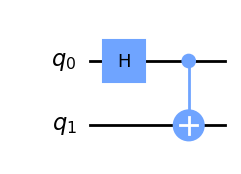

In [2]:
from qiskit import QuantumCircuit
 
#Create a new circuit with two qubits
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a CNOT gate on qubit 1
qc.cx(0, 1)
 
# Return a drawing of the circuit using MatPlotLib ("mpl").
qc.draw("mpl") #update this with mpl

We can see a very simple circuit above, which has two qubits. Qubit 0 has a Hadamard gate applied to it, while qubit 1 has CNOT, also known as the Controlled NOT gate applied to it. The Hadamard gate puts qubit 0 into a superposition state, while the CNOT gate performs a conditional operation where the state of the second qubit is flipped only if the first qubit is in the state |1⟩.

# Deutsch's Algorithm in Qiskit
***
Now that we have a grounding in the fundamentals of quantum computing, and an introduction to the essential components of Qiskit, we can begin implementing Deutsch's algorithm in Qiskit.

## Building the Quantum Circuit

## The Oracle Implementation

## Running the Simulation

<a id="References"></a>
# References
***

<a id="1"></a>[1] "Quantum Computing." IBM. Available at: [https://www.ibm.com/topics/quantum-computing](https://www.ibm.com/topics/quantum-computing)

<a id="2"></a>[2] "Simulating Physics with Computers." Richard P. Feynman. Available at: [https://s2.smu.edu/~mitch/class/5395/papers/feynman-quantum-1981.pdf](https://s2.smu.edu/~mitch/class/5395/papers/feynman-quantum-1981.pdf)

<a id="3"></a>[3] "What is a Qubit?" Microsoft Azure. Available at: [https://azure.microsoft.com/en-gb/resources/cloud-computing-dictionary/what-is-a-qubit](https://azure.microsoft.com/en-gb/resources/cloud-computing-dictionary/what-is-a-qubit)

<a id="4"></a>[4] "Einstein's ‘spooky action at a distance' spotted in objects almost big enough to see" Science.org. Available at: [https://www.science.org/content/article/einstein-s-spooky-action-distance-spotted-objects-almost-big-enough-see](https://www.science.org/content/article/einstein-s-spooky-action-distance-spotted-objects-almost-big-enough-see)

<a id="5"></a>[5] "Quantum Entaglement and Information" Stanford. Available at: [https://plato.stanford.edu/entries/qt-entangle/](https://plato.stanford.edu/entries/qt-entangle/)

<a id="6"></a>[6] "Quantum Gates, Quantum Circuit and Quantum Computation" Willaim & Mary (edu). Available at: [https://cklixx.people.wm.edu/teaching/QC2021/QC-chapter5.pdf](https://cklixx.people.wm.edu/teaching/QC2021/QC-chapter5.pdf)

<a id="7"></a>[7] "Quantum Circuits" IBM. Available at: [https://docs.quantum.ibm.com/api/qiskit/circuit](https://docs.quantum.ibm.com/api/qiskit/circuit)

<a id="8"></a>[8] "Quantum query algorithms" IBM. Available at: [https://learning.quantum.ibm.com/course/fundamentals-of-quantum-algorithms/quantum-query-algorithms](https://learning.quantum.ibm.com/course/fundamentals-of-quantum-algorithms/quantum-query-algorithms)

<a id="9"></a>[9] "Deutsch's Algorithm" Qubit.guide. Available at: [https://qubit.guide/10.4-deutschs-algorithm](https://qubit.guide/10.4-deutschs-algorithm) 

<a id="10"></a>[10] "The Deutsch Algorithm" Full-Stack Quantum Computation. Available at: [https://fullstackquantumcomputation.tech/blog/deutsch-algorithm/](https://fullstackquantumcomputation.tech/blog/deutsch-algorithm/) 

<a id="11"></a>[11] "The Qiskit Elements" IBM. Available at: [https://qiskit.org/documentation/stable/0.24/the_elements.html](https://qiskit.org/documentation/stable/0.24/the_elements.html) 

<a id="12"></a>[12] "Hello World" IBM. Available at: [https://docs.quantum.ibm.com/start/hello-world](https://docs.quantum.ibm.com/start/hello-world) 


